In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

<h3 Style='color:#0ed290'> 4. Seleccionando y dividendo la Data </h3>

In [2]:
rawData = pd.read_csv('BancoUnoFinal.csv', header=0)
rawData.head()

,20000,1,24,2,2.1,-1,-1.1,-2,-2.1,3913,...,0.6,0.7,1.1,0.8,0.9,0.10,0.11,1.2,1.3,0.12
0,120000,2,26,-1,2,0,0,0,2,2682,...,0,2000,1,0,0,0,0,1,1,0
1,90000,2,34,0,0,0,0,0,0,29239,...,1000,5000,1,0,0,0,0,1,0,1
2,50000,1,37,0,0,0,0,0,0,46990,...,1069,1000,1,0,0,0,0,1,0,1
3,50000,1,57,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,1,0,1
4,50000,2,37,0,0,0,0,0,0,64400,...,1000,800,0,1,1,0,0,0,0,1


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   20000   2395 non-null   int64
 1   1       2395 non-null   int64
 2   24      2395 non-null   int64
 3   2       2395 non-null   int64
 4   2.1     2395 non-null   int64
 5   -1      2395 non-null   int64
 6   -1.1    2395 non-null   int64
 7   -2      2395 non-null   int64
 8   -2.1    2395 non-null   int64
 9   3913    2395 non-null   int64
 10  3102    2395 non-null   int64
 11  689     2395 non-null   int64
 12  0       2395 non-null   int64
 13  0.1     2395 non-null   int64
 14  0.2     2395 non-null   int64
 15  0.3     2395 non-null   int64
 16  689.1   2395 non-null   int64
 17  0.4     2395 non-null   int64
 18  0.5     2395 non-null   int64
 19  0.6     2395 non-null   int64
 20  0.7     2395 non-null   int64
 21  1.1     2395 non-null   int64
 22  0.8     2395 non-null   int64
 23  0.9     2395 

In [4]:
Data = rawData[['20000', '0']]
Data.head()

,20000,0
0,120000,3272
1,90000,14331
2,50000,28314
3,50000,20940
4,50000,19394


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   20000   2395 non-null   int64
 1   0       2395 non-null   int64
dtypes: int64(2)
memory usage: 37.5 KB


In [6]:
X = np.array(Data['0']).reshape(-1, 1)
y = np.array(Data['20000']).reshape(-1, 1)

<h3 Style='color:#0ed290'> 5. Construcción del modelo </h3>

In [7]:
Data.dropna(inplace = True)
  
# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.12348211059028291


C:\Users\mgl_j\AppData\Local\Temp\ipykernel_21284\3791891228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.dropna(inplace = True)


In [8]:
model = LinearRegression(n_jobs=10)

In [9]:
print(y)

[[120000]
 [ 90000]
 [ 50000]
 ...
 [130000]
 [110000]
 [200000]]


In [10]:
print(cross_val_score(model, X, y, cv=3))

[0.11421506 0.08748977 0.21210874]


In [11]:
algosClass = []
algosClass.append(("Random Forest Regressor", RandomForestRegressor()))
algosClass.append(("Linear Regression", LinearRegression()))
algosClass.append(("Support Vector Regression", SVR()))

In [12]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X, y, cv=3, scoring="r2")
    names.append(name)
    results.append(result)

C:\Users\mgl_j\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mgl_j\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mgl_j\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mgl_j\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed wh

In [13]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor -0.06866300580790304
Linear Regression 0.13793785986758644
Support Vector Regression -0.039790790397142395


In [14]:
algo = LinearRegression()
model = algo.fit(X_train, y_train)

<h3 Style='color:#0ed290'> 6. Predicciones y evaluación de resultados </h3>

In [16]:
predictions = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_true=y_test,y_pred=predictions)
mse = mean_squared_error(y_true=y_test,y_pred=predictions)
predRsquared = r2_score(y_test, predictions)
print("R Cuadrado: %.3f" % predRsquared)
print("RMSE: %.3f" % rmse)
print("MAE: %.3f" % mae)
print("MSE: %.3f" % mse)

R Cuadrado: 0.123
RMSE: 125189.431
MAE: 99530.876
MSE: 15672393729.661


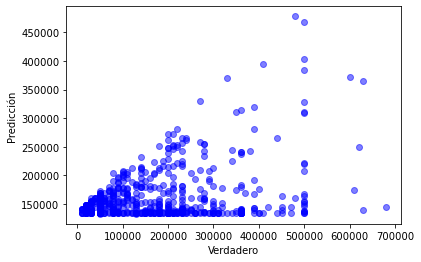

In [22]:
plt.scatter(y_test, predictions, color="b", alpha = 0.5)
plt.xlabel("Verdadero")
plt.ylabel("Predicción")
plt.show()

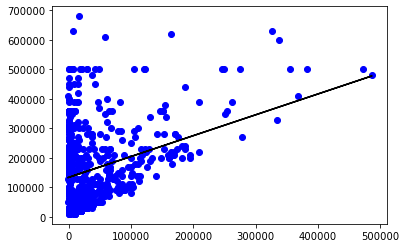

In [23]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')  
plt.show()